In [1]:
import pandas as pd

from benchmark._plot_util import *

In [2]:
df = pd.read_csv('results/runtime1.csv')
df2 = pd.read_csv('results/runtime_new.csv')
df2.rename(columns={"num_qubits": 'base_qubits'}, inplace=True)
df = pd.concat([df, df2])
df = df[df['base_qubits'] <= 100]
df["name"]

0       vqe
1       vqe
2       vqe
3       vqe
4       vqe
5       vqe
6     qaoa2
7     qaoa2
8     qaoa2
9     qaoa2
10    qaoa2
11    qaoa2
12    qaoa2
13    qaoa2
14    qaoa2
15      vqe
0       qml
1       qml
2       qml
3       qml
4       qml
5       qml
11    qoao1
12    qoao1
13    qoao1
14    qoao1
15    qoao1
16    qoao1
17    qoao1
Name: name, dtype: object

In [3]:
# all columns that and with _post
post_columns = [
    "qtpu_post",
    "qtpu_gpu_post",
    "ckt_post",
]
cols = post_columns + ["base_qubits", "name"]


# df = df[post_columns + ["base_qubits"]]



In [4]:
def plot_bar(df, ax, x, y, yerr=None):
    df.plot.bar(
        x=x, y=y, rot=0, width=0.8, edgecolor="black", linewidth=2, ax=ax, legend=False, yerr=yerr
    )

    hatches = ["**", "//", "oo", "xx", "oo", "OO"]

    color_to_hatch = {}

    i = 0
    for patch in ax.patches:
        if patch.get_facecolor() not in color_to_hatch:
            color_to_hatch[patch.get_facecolor()] = hatches[i % len(hatches)]
            i += 1

    for patch in ax.patches:
        patch.set_hatch(color_to_hatch[patch.get_facecolor()])

0       vqe
1       vqe
2       vqe
3       vqe
4       vqe
5       vqe
6     qaoa2
7     qaoa2
8     qaoa2
9     qaoa2
10    qaoa2
11    qaoa2
12    qaoa2
13    qaoa2
14    qaoa2
15      vqe
0       qml
1       qml
2       qml
3       qml
4       qml
5       qml
11    qoao1
12    qoao1
13    qoao1
14    qoao1
15    qoao1
16    qoao1
17    qoao1
Name: name, dtype: object


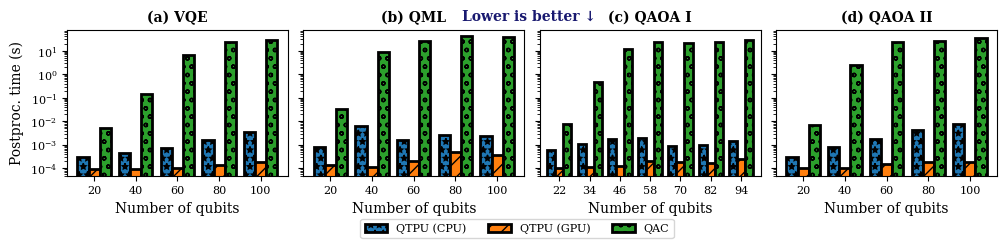

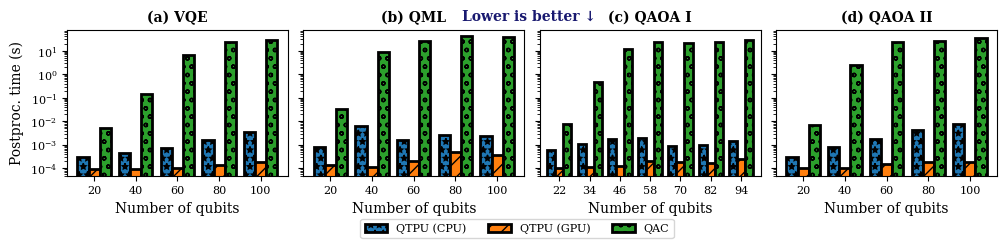

In [25]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(12, 1.9), sharey=True)
fig.subplots_adjust(wspace=0.07)


# df = df[df["base_qubits"] % 20 == 0]
df_vqe = df[df["name"] == "vqe"].groupby(["name", "base_qubits"]).mean().reset_index()
# df_vqe = df_vqe[df_vqe["base_qubits"] % 20 == 0]
df_qml = df[df["name"] == "qml"].groupby(["name", "base_qubits"]).mean().reset_index()
df_qaoa2 = (
    df[df["name"] == "qaoa2"].groupby(["name", "base_qubits"]).mean().reset_index()
)
df_qaoa2 = df_qaoa2[df_qaoa2["base_qubits"] % 20 == 0]
df_qaoa1 = (
    df[df["name"] == "qoao1"]#.groupby(["name", "base_qubits"]).mean().reset_index()
)

print(df["name"])

plot_bar(df_vqe, ax0, "base_qubits", post_columns)
plot_bar(df_qml, ax1, "base_qubits", post_columns)
plot_bar(df_qaoa1, ax2, "base_qubits", post_columns)
plot_bar(df_qaoa2, ax3, "base_qubits", post_columns)

for ax in [ax0, ax1, ax2, ax3]:
    ax.set_yscale("log")
    # ax.legend(["QTPU-CPU", "QTPU-GPU", "CKT"])
    ax.set_xlabel("Number of qubits")
    ax.set_ylabel("Postproc. time (s)")

ax0.set_title("(a) VQE", fontweight="bold")
ax1.set_title("(b) QML", fontweight="bold")
ax2.set_title("(c) QAOA I", fontweight="bold")
ax3.set_title("(d) QAOA II", fontweight="bold")

fig.text(
    0.51,
    .95,
    "Lower is better ↓",
    ha="center",
    va="center",
    fontweight="bold",
    color="midnightblue",
)

# put the legend at the bottom
handles, labels = ax0.get_legend_handles_labels()
fig.legend(handles, ["QTPU (CPU)", "QTPU (GPU)", "QAC"], loc="lower center", ncol=3, bbox_to_anchor=(0.5, -0.245))

fig

In [26]:
fig.savefig("runtime1.pdf", bbox_inches="tight")